In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from collections import *
from math import sqrt,ceil,log2,floor,pi

In [ ]:
default_path = "/content/drive/MyDrive/StockS_Data/"

In [ ]:
df_adani = pd.read_csv(default_path+"ADANIPORTS.csv")

In [ ]:
df_adani.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
Counter(list(df_adani["Symbol"]))

Counter({'ADANIPORTS': 2299, 'MUNDRAPORT': 1023})

In [ ]:
df_adani["Trades"].isna().sum()

0

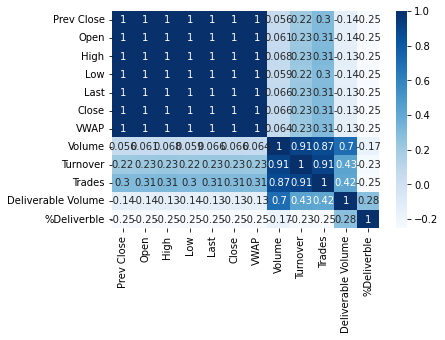

In [ ]:
sns.heatmap(df_adani.corr(),cmap='Blues',annot = True)
plt.show()

In [ ]:
new_list= list(df_adani.columns)
new_list = new_list[3:10]

In [ ]:
data2 = df_adani.copy(deep=True)

In [ ]:
n = len(new_list);
for i in range(n-1):
    for j in range(i+1,n):
        strs = new_list[i]+"-"+new_list[j]
        data2[strs] = data2[new_list[i]] - data2[new_list[j]]
    


In [ ]:
len(data2.columns)


36

In [ ]:
data2 = data2.drop(labels= list(df_adani.columns),axis = 1)

In [ ]:
df_adani.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,4.318821e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.643650e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,4.492259e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,4.585475e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


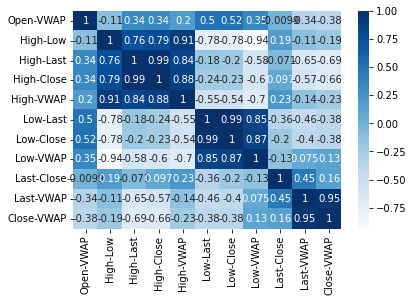

In [ ]:
sns.heatmap(data2.iloc[:,10:21].corr(),cmap = "Blues",annot = True)

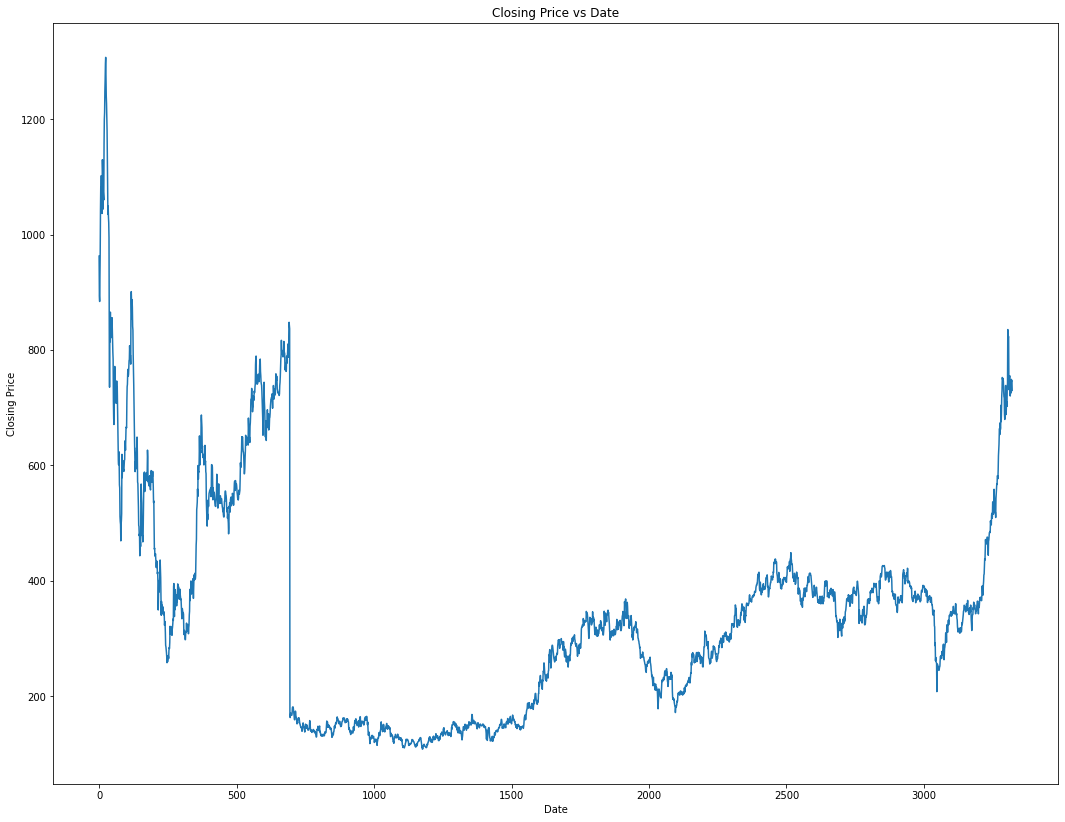

In [ ]:
# df_adani.set_index()
# new_columns = ["SMA","STD","Bollinger Upper","Bollinger Lower"]
# df_adani_newf[new_columns].plot(figsize = (13,7))
# plt.title("Plot of Standard Moving Average,Standard deviation,Bollinger Upper Band,Bollinger Lower band against Date")
# plt.xlabel("Date")
# plt.show()
df_adani["Date"] = pd.to_datetime(df_adani["Date"],format = "%Y-%m-%d")

df_adani.set_index(pd.DatetimeIndex(list(df_adani["Date"])))
df_adani["Close"].plot(figsize=(18,14))
plt.title("Closing Price vs Date")
plt.xlabel("Date")
plt.ylabel('Closing Price')
plt.show()


In [ ]:
df_adani["Date"][:5]

0   2007-11-27
1   2007-11-28
2   2007-11-29
3   2007-11-30
4   2007-12-03
Name: Date, dtype: datetime64[ns]

In [ ]:
df_adani.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088


In [ ]:
dates = df_adani["Date"]

In [ ]:
diff_dates=[]
for i in range(len(dates) - 1):
    diff_dates.append((dates[i+1] - dates[i]).days)
    alpha = (dates[i+1] - dates[i]).days
    # if(alpha==4):
    #     print(dates[i],dates[i+1])
print(Counter(diff_dates))
# '''
# Counter(diff_dates) stores count of difference between two different dates for example if 20 times consecutive dates in stock market differ by 1 day then it
# will key,value pair: (1,20)
# diff_dates stores difference b/w two consecutive dates
# '''


Counter({1: 2522, 3: 609, 2: 108, 4: 73, 5: 8, 6: 1})


In [ ]:
df_adani_newf = df_adani.copy()

In [ ]:
df_adani_newf.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088


In [ ]:
df_adani_newf.set_index(pd.DatetimeIndex(list(df_adani_newf["Date"])))

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,44922.588355,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,44922.588355,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.000000,838079,0.0892
2021-04-27,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.000000,1779639,0.0865
2021-04-28,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.000000,1342353,0.1203
2021-04-29,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.000000,1304895,0.0942


In [ ]:
df_adani_newf.drop(columns=["Symbol","Series"],axis = 1,inplace = True)

In [ ]:
df_adani_newf.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612
1,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172
2,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088
3,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,44922.588355,1260913,0.2735
4,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,44922.588355,816123,0.2741


In [ ]:
df_adani_newf = df_adani_newf.set_index(pd.DatetimeIndex(list(df_adani_newf["Date"])))

In [ ]:
df_adani_newf.head(3)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2007-11-27,2007-11-27,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612
2007-11-28,2007-11-28,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172
2007-11-29,2007-11-29,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088


In [ ]:
window_size = 20

In [ ]:
# SMA -> Standard Moving Average
df_adani_newf["SMA"] = df_adani_newf["Close"].rolling(window = window_size).mean()

In [ ]:
df_adani_newf["STD"] = df_adani_newf["Close"].rolling(window = window_size).std()

In [ ]:
df_adani_newf["Bollinger Upper"] = df_adani_newf["SMA"] + df_adani_newf["STD"]*2
df_adani_newf["Bollinger Lower"] = df_adani_newf["SMA"] - df_adani_newf["STD"]*2


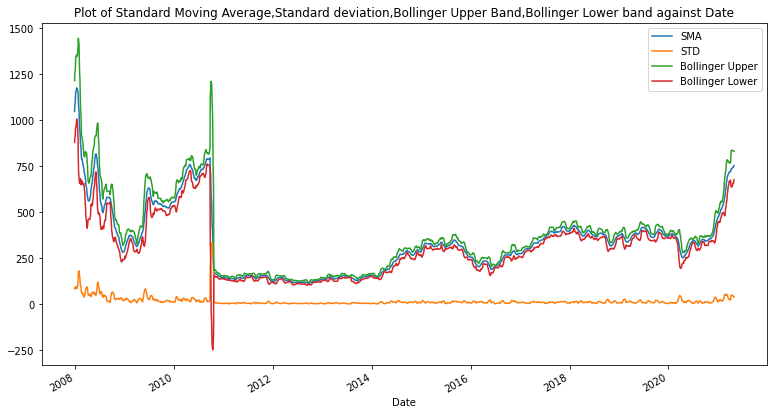

In [ ]:
new_columns = ["SMA","STD","Bollinger Upper","Bollinger Lower"]
df_adani_newf[new_columns].plot(figsize = (13,7))
plt.title("Plot of Standard Moving Average,Standard deviation,Bollinger Upper Band,Bollinger Lower band against Date")
plt.xlabel("Date")
plt.show()

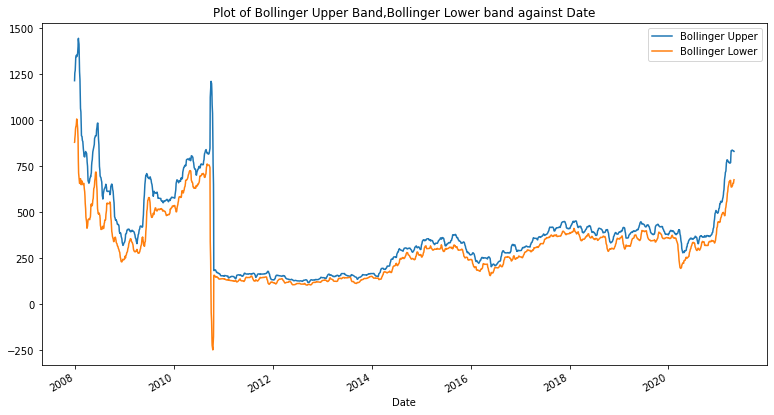

In [ ]:
new_columns = ["Bollinger Upper","Bollinger Lower"]
df_adani_newf[new_columns].plot(figsize = (13,7))
plt.title("Plot of Bollinger Upper Band,Bollinger Lower band against Date")
plt.xlabel("Date")
plt.show()

In [ ]:
df_adani_newf.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,STD,Bollinger Upper,Bollinger Lower
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612,NaN,NaN,NaN,NaN
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172,NaN,NaN,NaN,NaN
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088,NaN,NaN,NaN,NaN
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,44922.588355,1260913,0.2735,NaN,NaN,NaN,NaN
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,44922.588355,816123,0.2741,NaN,NaN,NaN,NaN


In [ ]:
df_adani_newf["Bollinger Upper"].isna().sum()

19

In [ ]:
df_adani_newf = df_adani_newf.fillna(df_adani_newf.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
# df_adani_newf.isna().sum()


In [ ]:
df_adani_newf.to_csv("New Adani Datafrae with added features SMA,STD,Bollinger Upper,Bollinger Lower and removed useless features Series and Symbol.csv")

In [ ]:
from scipy.stats import linregress
def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return ((1 + slope) ** 252) * (rvalue ** 2)

In [ ]:
df_adani_newf["Momentum"] = df_adani_newf["Close"].rolling(90).apply(momentum,raw = False)

In [ ]:
df_adani_newf["Momentum"].fillna(df_adani_newf["Momentum"].mean())

2007-11-27    0.688626
2007-11-28    0.688626
2007-11-29    0.688626
2007-11-30    0.688626
2007-12-03    0.688626
                ...   
2021-04-26    4.719806
2021-04-27    4.637634
2021-04-28    4.541741
2021-04-29    4.455725
2021-04-30    4.331043
Name: Momentum, Length: 3322, dtype: float64

In [ ]:
def new_rolling(high,low,close,lookback_period):
    # https://medium.com/codex/algorithmic-trading-with-williams-r-in-python-5a8e0db9ff1f
    highest_in_high = high.rolling(lookback_period).max()
    lowest_in_low = low.rolling(lookback_period).min()
    result = (highest_in_high-close)/(highest_in_high - lowest_in_low)*(-100)
    return result


In [ ]:
window_size_for_williams = 14

In [ ]:
df_adani_newf[f"Williams %{window_size_for_williams}"] = new_rolling(df_adani_newf["High"],df_adani_newf["Low"],df_adani_newf["Close"],window_size_for_williams);

In [ ]:
df_adani_newf.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,STD,Bollinger Upper,Bollinger Lower,Momentum,Williams %14
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,44922.588355,9859619,0.3612,341.137926,17.278487,375.6949,306.580953,NaN,NaN
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,44922.588355,1453278,0.3172,341.137926,17.278487,375.6949,306.580953,NaN,NaN
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,44922.588355,1069678,0.2088,341.137926,17.278487,375.6949,306.580953,NaN,NaN
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,44922.588355,1260913,0.2735,341.137926,17.278487,375.6949,306.580953,NaN,NaN
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,44922.588355,816123,0.2741,341.137926,17.278487,375.6949,306.580953,NaN,NaN


In [ ]:
def Add_Stochastic_Oscillator(high,low,close,lookback_period):
    # https://www.alpharithms.com/stochastic-oscillator-in-python-483214/#:~:text=The%20stochastic%20oscillator%20is%20a,many%20advantages%20in%20algorithmic%20trading.
    highest_in_high = high.rolling(lookback_period).max()
    lowest_in_low = low.rolling(lookback_period).min()
    new_col1=(close - low) * 100 / (high-low);
    new_col2 = new_col1.rolling(3).mean()
    return [new_col1,new_col2]
# Uses the %k to calculates a SMA over the past 3 values of %k
# df['%D'] = df['%K'].rolling(d_period).mean()


In [ ]:
res1,res2 = Add_Stochastic_Oscillator(df_adani_newf["High"],df_adani_newf["Low"],df_adani_newf["Close"],window_size_for_williams);
df_adani_newf[f"Stochastic %K with window size{window_size_for_williams}"] = res1;
df_adani_newf["Stochastic %D with window size 3"] = res2;


In [ ]:
df_adani_newf.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,Deliverable Volume,%Deliverble,SMA,STD,Bollinger Upper,Bollinger Lower,Momentum,Williams %14,Stochastic %K with window size14,Stochastic %D with window size 3
2007-11-27,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,...,9859619,0.3612,341.137926,17.278487,375.6949,306.580953,NaN,NaN,68.892857,NaN
2007-11-28,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,...,1453278,0.3172,341.137926,17.278487,375.6949,306.580953,NaN,NaN,17.155172,NaN
2007-11-29,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,...,1069678,0.2088,341.137926,17.278487,375.6949,306.580953,NaN,NaN,58.576271,48.208100
2007-11-30,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,...,1260913,0.2735,341.137926,17.278487,375.6949,306.580953,NaN,NaN,46.397059,40.709501
2007-12-03,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,...,816123,0.2741,341.137926,17.278487,375.6949,306.580953,NaN,NaN,64.794521,56.589284


In [ ]:
df_adani_newf.shape

(3322, 21)

In [ ]:
df_adani_newf.dropna(inplace = True)

In [ ]:
print(df_adani_newf.shape)

(3233, 21)


In [ ]:
df_adani_newf.reset_index(drop = True,inplace = True)

In [ ]:
df_adani_newf.head(3)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,Deliverable Volume,%Deliverble,SMA,STD,Bollinger Upper,Bollinger Lower,Momentum,Williams %14,Stochastic %K with window size14,Stochastic %D with window size 3
0,2008-04-07,593.20,595.0,605.3,570.00,591.8,593.40,590.59,466172,2.753179e+13,...,160462,0.3442,562.510,50.278235,663.066471,461.953529,0.071651,-38.387716,66.288952,43.125700
1,2008-04-08,593.40,625.0,625.0,585.10,588.0,589.65,590.78,217730,1.286301e+13,...,64935,0.2982,561.505,49.478799,660.462598,462.547402,0.070348,-40.187140,11.403509,35.322774
2,2008-04-09,589.65,580.5,623.0,575.15,598.9,597.75,605.82,507422,3.074086e+13,...,89005,0.1754,561.335,49.341066,660.017132,462.652868,0.068881,-36.300384,47.230930,41.641130


In [ ]:
df_adani_newf["Symbol"] = df_adani["Symbol"]
df_adani_newf["Series"]= df_adani["Series"]

In [ ]:
df_adani_newf.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,...,SMA,STD,Bollinger Upper,Bollinger Lower,Momentum,Williams %14,Stochastic %K with window size14,Stochastic %D with window size 3,Symbol,Series
0,2008-04-07,593.20,595.0,605.3,570.00,591.80,593.40,590.59,466172,2.753179e+13,...,562.510,50.278235,663.066471,461.953529,0.071651,-38.387716,66.288952,43.125700,MUNDRAPORT,EQ
1,2008-04-08,593.40,625.0,625.0,585.10,588.00,589.65,590.78,217730,1.286301e+13,...,561.505,49.478799,660.462598,462.547402,0.070348,-40.187140,11.403509,35.322774,MUNDRAPORT,EQ
2,2008-04-09,589.65,580.5,623.0,575.15,598.90,597.75,605.82,507422,3.074086e+13,...,561.335,49.341066,660.017132,462.652868,0.068881,-36.300384,47.230930,41.641130,MUNDRAPORT,EQ
3,2008-04-10,597.75,615.0,615.0,586.00,611.00,608.60,609.93,495019,3.019252e+13,...,560.580,48.443924,657.467848,463.692152,0.067573,-31.094050,77.931034,45.521824,MUNDRAPORT,EQ
4,2008-04-11,608.60,610.0,620.0,605.00,610.75,610.20,612.70,301522,1.847423e+13,...,560.945,48.805716,658.556431,463.333569,0.066528,-30.333573,34.666667,53.276210,MUNDRAPORT,EQ


In [ ]:
df_adani_newf.to_csv("SMA STD Bol Upper,Lower and also some extra new features.csv")